# Task 04 - Recommendation System - Movie Recommendation
### This notebook outlines the concepts involved in building a Complete Recommendation System for recommending Movies to users
### Movie Recommender System - A very simple Clone of Netflix

### 1,000,000 ratings database
**MovieLens dataset** and build a model to **recommend movies** to the end users. This data has been collected by the GroupLens Research Project at the University of Minnesota. 

This dataset consists of:
- **1 million ratings** (1-5) from **6000 users** on **3700 movies**
- Demographic information of the users (age, gender, etc.)

Dataset: 

### Import the libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Download the dataset

In [ ]:
# ! wget https://raw.githubusercontent.com/subashgandyer/datasets/main/ml-100k/ml-1m.zip
! wget https://files.grouplens.org/datasets/movielens/ml-1m.zip

--2022-11-15 16:22:22--  https://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  13.4MB/s    in 0.4s    

2022-11-15 16:22:22 (13.4 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]



In [ ]:
! unzip ml-1m.zip

Archive:  ml-1m.zip
   creating: ml-1m/
  inflating: ml-1m/movies.dat        
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         


### Load the dataset
### Reading users file
- users.dat

- Please check the column names from the readme file
- Pass in column names for each CSV as the column name is not given in the file and read them using pandas
- Use these following columns
    - 'user_id', 'age', 'sex', 'occupation', 'zip_code'

In [ ]:
u_cols = ['user_id', 'sex', 'age', 'occupation', 'zip_code']
# UserID::Gender::Age::Occupation::Zip-code

users = pd.read_csv('./ml-1m/users.dat', 
                    sep='::', 
                    names=u_cols,
                    encoding='latin-1',
                    engine='python')

### Display the user data

In [ ]:
users

,user_id,sex,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
users.shape

(6040, 5)

### Reading ratings file
- "ratings.dat" 
- Use the following columns
    - 'user_id', 'movie_id', 'rating', 'unix_timestamp'

In [ ]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings = pd.read_csv('./ml-1m/ratings.dat', 
                    sep='::', 
                    names=r_cols,
                    encoding='latin-1',
                    engine='python')

### Display the Ratings data

In [ ]:
ratings.shape

(1000209, 4)

In [ ]:
ratings

,user_id,movie_id,rating,unix_timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


### Reading items file
- movies.dat
- Use the following columns
    - 'movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
    - 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
    - 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
-MovieID::Title::Genres

In [ ]:
i_cols = ['movie_id', 'movie_title' ,'genres']

items = pd.read_csv('./ml-1m/movies.dat', 
                    sep='::', 
                    names=i_cols,
                    encoding='latin-1',
                    engine='python')

### Display the Items data

In [ ]:
items.shape

(3883, 3)

In [ ]:
items.head()

,movie_id,movie_title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### Reading Training and Testing Ratings data
- Training
    - ua.base
- Testing
    - ua.test
- Use the following columns
    - 'user_id', 'movie_id', 'rating', 'unix_timestamp'

### Display the Training and Testing Ratings data

In [ ]:
# ratings_train.shape, ratings_test.shape

### How many unique users?

In [ ]:
n_users = ratings.user_id.unique().shape[0]
n_users

6040

### How many unique items / movies?

In [ ]:
n_items = ratings.movie_id.unique().shape[0]
n_items

3706

### Important!! 
### Cleaning the dataset for inconsistencies among 'movie-id's in items and ratings datasets

In [ ]:
items = items[items['movie_id'].isin(ratings['movie_id'])]

In [ ]:
users = users[users['user_id'].isin(ratings['user_id'])]
users

,user_id,sex,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


### Create a User-Item Matrix

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
user_movies_data = ratings.pivot(index = 'movie_id', 
                                 columns = 'user_id', 
                                 values = 'rating').fillna(0)

In [ ]:
user_movies_data

user_id,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,...,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_movies_data.shape

(3706, 6040)

In [ ]:
len(items.movie_title.tolist())

3706

# 1. Content Filtering

### Data Preparation
Prepare data for Metadata to have a TF-IDF Vectorizer for Content Filtering

In [ ]:
items

,movie_id,movie_title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
# Replace '|' with ' ' from the 'genres' column
items['genres'] = items['genres'].str.replace('|', ' ',regex=True)

In [ ]:
items

,movie_id,movie_title,genres
0,1,Toy Story (1995),Animation Children's Comedy
1,2,Jumanji (1995),Adventure Children's Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


## TF-IDF Vectorizer on Metadata

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(items['genres'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), 
                        index=items.index.tolist())
print(tfidf_df.shape)

(3706, 20)


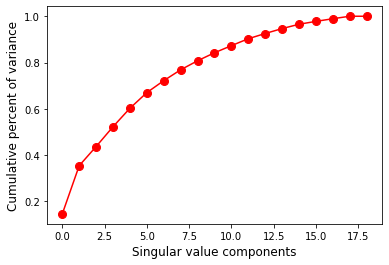

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=19)
latent_matrix = svd.fit_transform(tfidf_df)

# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()

plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [ ]:
n = 20
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], 
                                  index=items.movie_title.tolist())

In [ ]:
latent_matrix_1_df.shape

(3706, 19)

In [ ]:
latent_matrix_1_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Toy Story (1995),0.131443,0.354730,0.003497,-0.060781,-0.058548,-0.112032,0.197651,0.612425,0.057397,0.002183,0.248939,-0.365250,-0.176218,-0.021853,-0.005641,0.418450,-0.037617,0.127745,7.064587e-18
Jumanji (1995),0.024420,0.038096,0.122168,0.016925,-0.096512,-0.266722,0.202400,0.653239,0.031136,-0.007626,-0.122251,0.197085,-0.114762,-0.019195,-0.016010,-0.390022,0.062261,0.458252,-1.699524e-16
Grumpier Old Men (1995),0.307390,0.628799,0.031327,0.677881,0.216220,0.017183,0.007045,-0.032718,0.005599,-0.001262,-0.016378,-0.016152,-0.025234,-0.013818,-0.004682,0.005555,0.000355,-0.003183,6.276584e-18
Waiting to Exhale (1995),0.865284,0.455073,-0.109669,-0.165875,-0.040563,0.018074,0.003499,-0.035903,-0.023577,-0.004147,-0.024252,0.005742,0.001568,-0.003979,-0.007531,0.009686,0.000754,0.003730,-2.103015e-17
Father of the Bride Part II (1995),0.336103,0.923469,-0.077980,-0.145288,-0.055150,0.033183,-0.006907,-0.044398,-0.015222,-0.003175,-0.013120,0.017438,0.000633,-0.001250,-0.007205,0.010102,-0.000076,0.003957,-3.477232e-17


## 2. Collaborative Filtering
- Use user_movies_data

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=200)

latent_matrix_2 = svd.fit_transform(user_movies_data)

In [ ]:
latent_matrix_2

array([[ 1.32784373e+02, -1.40580377e+01, -1.73402746e+01, ...,
        -2.35029004e+00, -2.35041063e+00,  3.18718553e+00],
       [ 4.45733992e+01, -2.00009730e+01,  5.85721538e+00, ...,
        -2.49058005e+00,  2.60389330e-01,  1.26537653e-01],
       [ 2.60616323e+01, -1.12140549e+01, -7.22728993e+00, ...,
         1.38343091e+00, -4.59031638e+00, -1.90121454e+00],
       ...,
       [ 4.95124437e+00,  1.25836648e+00, -1.02507263e+00, ...,
        -1.17785351e+00,  7.24176980e-02,  1.08793249e-01],
       [ 2.20815915e+00,  1.52066866e+00, -2.02400886e+00, ...,
        -6.09015605e-01, -3.24931295e-01,  3.88615234e-01],
       [ 2.50975091e+01,  3.37157689e+00, -1.28523763e+01, ...,
         9.06100243e-02,  9.90595653e-01, -6.54853421e-01]])

In [ ]:
latent_matrix_2.shape

(3706, 200)

In [ ]:
len(latent_matrix_2)

3706

In [ ]:
items.movie_title.tolist()

['Toy Story (1995)',
 'Jumanji (1995)',
 'Grumpier Old Men (1995)',
 'Waiting to Exhale (1995)',
 'Father of the Bride Part II (1995)',
 'Heat (1995)',
 'Sabrina (1995)',
 'Tom and Huck (1995)',
 'Sudden Death (1995)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Dracula: Dead and Loving It (1995)',
 'Balto (1995)',
 'Nixon (1995)',
 'Cutthroat Island (1995)',
 'Casino (1995)',
 'Sense and Sensibility (1995)',
 'Four Rooms (1995)',
 'Ace Ventura: When Nature Calls (1995)',
 'Money Train (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Assassins (1995)',
 'Powder (1995)',
 'Leaving Las Vegas (1995)',
 'Othello (1995)',
 'Now and Then (1995)',
 'Persuasion (1995)',
 'City of Lost Children, The (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Dangerous Minds (1995)',
 'Twelve Monkeys (1995)',
 'Wings of Courage (1995)',
 'Babe (1995)',
 'Carrington (1995)',
 'Dead Man Walking (1995)',
 'Across the Sea of Time (1995)',
 'It Takes Two (1995)',
 'Clueless (

In [ ]:
len(items.movie_title.tolist())

3706

In [ ]:

latent_matrix_2_df = pd.DataFrame(
                                  latent_matrix_2, 
                                  index=items.movie_title.tolist())

In [ ]:
latent_matrix_2_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),132.784373,-14.058038,-17.340275,2.518697,55.508155,7.595662,-0.035544,7.419398,-5.080141,-27.910444,...,3.450411,-4.300250,-1.571226,-1.044410,-4.751337,-0.715279,-1.286916,-2.350290,-2.350411,3.187186
Jumanji (1995),44.573399,-20.000973,5.857215,-16.107409,4.262058,-2.169591,-13.422494,1.170185,4.537861,-8.881406,...,-2.798099,-0.582863,-0.991714,-3.436405,2.060956,1.998062,0.699433,-2.490580,0.260389,0.126538
Grumpier Old Men (1995),26.061632,-11.214055,-7.227290,-14.062228,2.594795,2.326935,-2.418638,6.495409,-1.922110,0.955062,...,-0.896785,-2.680253,-1.584469,1.428720,-0.808322,0.487401,0.184111,1.383431,-4.590316,-1.901215
Waiting to Exhale (1995),10.078310,-1.989030,-7.102705,-7.808539,-1.168943,0.549981,-2.255726,-2.012780,1.381024,1.046469,...,0.972788,-0.711651,-1.164947,0.153917,-0.592323,-0.291487,0.117912,1.603584,-1.038153,-0.455207
Father of the Bride Part II (1995),18.395406,-9.055474,-7.171111,-14.964850,1.917957,3.063568,-1.961754,4.847972,-1.605676,-0.106709,...,-0.213045,2.317532,1.275935,-0.719941,-1.075274,-0.588224,1.603354,0.604367,-0.870421,-0.880975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Meet the Parents (2000),47.975035,-8.135795,-22.778547,8.547096,5.335573,-3.448148,-8.520965,10.735110,-3.917177,7.980575,...,4.228259,0.407139,5.073679,9.812088,-11.299070,0.207879,3.163050,4.227221,4.673743,0.597759
Requiem for a Dream (2000),24.457903,3.746270,-12.838007,7.045934,-6.276300,-11.966488,-7.286283,-0.539990,2.006434,1.040303,...,1.962005,-2.544019,-1.124252,1.675541,1.823096,0.346602,-1.084144,-1.699112,-0.282659,-0.291178
Tigerland (2000),4.951244,1.258366,-1.025073,0.189323,-2.343650,-1.504852,-2.011101,0.402277,0.464817,0.813351,...,0.319419,-1.241275,-0.896614,0.506716,0.424534,0.610965,-0.897272,-1.177854,0.072418,0.108793
Two Family House (2000),2.208159,1.520669,-2.024009,0.574609,-0.385178,-1.108706,-2.178415,-0.500713,0.047734,1.301534,...,-0.306950,-0.676368,-0.111301,1.134826,0.923941,0.451827,0.163648,-0.609016,-0.324931,0.388615


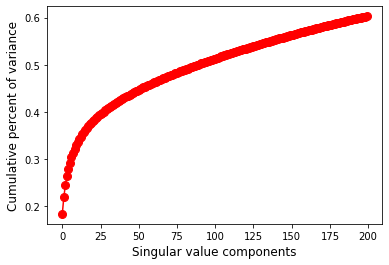

In [ ]:
# plot variance expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()

plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# take the latent vectors for a selected movie from both content 
# and collaborative matrixes
a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc["Toy Story (1995)"]).reshape(1, -1)

# calculate the similartity of this movie with the others in the list
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# an average measure of both content and collaborative 
hybrid = ((score_1 + score_2)/2.0)

# form a data frame of similar movies 
dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
# dictDf = {'collaborative': score_2} 
similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

#sort it on the basis of either: content, collaborative or hybrid, 
# here : content
similar.sort_values('content', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
"American Tail: Fievel Goes West, An (1991)",1.000000,0.392314,0.696157
Chicken Run (2000),1.000000,0.499434,0.749717
"Bug's Life, A (1998)",1.000000,0.634287,0.817143
"Rugrats Movie, The (1998)",1.000000,0.381779,0.690889
"Adventures of Rocky and Bullwinkle, The (2000)",1.000000,0.358308,0.679154
"American Tail, An (1986)",1.000000,0.468228,0.734114
Saludos Amigos (1943),1.000000,0.191412,0.595706
Aladdin and the King of Thieves (1996),1.000000,0.449559,0.724779
Toy Story 2 (1999),1.000000,0.701487,0.850744
Tarzan (1999),0.938437,0.543496,0.740967


In [ ]:
similar.sort_values('collaborative', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Aladdin (1992),0.812566,0.706432,0.759499
Toy Story 2 (1999),1.000000,0.701487,0.850744
Groundhog Day (1993),0.197957,0.650896,0.424426
"Lion King, The (1994)",0.745574,0.638013,0.691793
"Bug's Life, A (1998)",1.000000,0.634287,0.817143
Wayne's World (1992),0.345450,0.633000,0.489225
Beauty and the Beast (1991),0.745574,0.631190,0.688382
"Mask, The (1994)",0.111417,0.612410,0.361913
Babe (1995),0.625126,0.605279,0.615202
Men in Black (1997),0.102950,0.600133,0.351541


In [ ]:
similar.sort_values('hybrid', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Toy Story 2 (1999),1.000000,0.701487,0.850744
"Bug's Life, A (1998)",1.000000,0.634287,0.817143
Antz (1998),0.938437,0.581914,0.760175
Aladdin (1992),0.812566,0.706432,0.759499
Chicken Run (2000),1.000000,0.499434,0.749717
Tarzan (1999),0.938437,0.543496,0.740967
Mulan (1998),0.938437,0.538584,0.738510
"American Tail, An (1986)",1.000000,0.468228,0.734114
Pinocchio (1940),0.938437,0.512255,0.725346
"Iron Giant, The (1999)",0.938437,0.512126,0.725281


## 3. Hybrid Recommendation System

In [ ]:
def recommend_similar_movies(title):
    # take the latent vectors for a selected movie from both content 
    # and collaborative matrixes
    a_1 = np.array(latent_matrix_1_df.loc[title]).reshape(1, -1)
    a_2 = np.array(latent_matrix_2_df.loc[title]).reshape(1, -1)

    # calculate the similartity of this movie with the others in the list
    score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

    # an average measure of both content and collaborative 
    hybrid = ((score_1 + score_2)/2.0)

    # form a data frame of similar movies 
    dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
    similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

    #sort it on the basis of either: content, collaborative or hybrid
    similar.sort_values('hybrid', ascending=False, inplace=True)

    print(similar[1:].head(11))

In [ ]:
recommend_similar_movies("Toy Story (1995)")

                                         content  collaborative    hybrid
Toy Story 2 (1999)                      1.000000       0.701487  0.850744
Bug's Life, A (1998)                    1.000000       0.634287  0.817143
Antz (1998)                             0.938437       0.581914  0.760175
Aladdin (1992)                          0.812566       0.706432  0.759499
Chicken Run (2000)                      1.000000       0.499434  0.749717
Tarzan (1999)                           0.938437       0.543496  0.740967
Mulan (1998)                            0.938437       0.538584  0.738510
American Tail, An (1986)                1.000000       0.468228  0.734114
Pinocchio (1940)                        0.938437       0.512255  0.725346
Iron Giant, The (1999)                  0.938437       0.512126  0.725281
Aladdin and the King of Thieves (1996)  1.000000       0.449559  0.724779


In [ ]:
recommend_similar_movies("GoldenEye (1995)")

                                    content  collaborative    hybrid
Rock, The (1996)                   1.000000       0.787124  0.893562
Clear and Present Danger (1994)    1.000000       0.778426  0.889213
Con Air (1997)                     1.000000       0.753579  0.876790
Chain Reaction (1996)              1.000000       0.636353  0.818176
World Is Not Enough, The (1999)    0.766889       0.847539  0.807214
Daylight (1996)                    1.000000       0.613087  0.806544
Mummy, The (1999)                  0.854382       0.754107  0.804244
Anaconda (1997)                    1.000000       0.603568  0.801784
Waterworld (1995)                  0.839022       0.744007  0.791514
Twister (1996)                     0.874748       0.693359  0.784053
Die Hard: With a Vengeance (1995)  0.766889       0.797826  0.782357


In [ ]:
recommend_similar_movies("Mission: Impossible (1996)")

                                              content  collaborative    hybrid
Young Sherlock Holmes (1985)                 1.000000       0.552476  0.776238
Waterworld (1995)                            0.715559       0.762234  0.738896
Rising Sun (1993)                            0.790151       0.648069  0.719110
Congo (1995)                                 0.788694       0.635854  0.712274
Conspiracy Theory (1997)                     0.656304       0.741402  0.698853
Indiana Jones and the Temple of Doom (1984)  0.715559       0.677201  0.696380
Ghost and the Darkness, The (1996)           0.715559       0.667925  0.691742
Rock, The (1996)                             0.600370       0.779948  0.690159
Con Air (1997)                               0.600370       0.777566  0.688968
GoldenEye (1995)                             0.600370       0.765666  0.683018
True Lies (1994)                             0.557219       0.798171  0.677695


## Turicreate - Python Library for easy recommendation engine building

In [ ]:
# turicreate runs on Linux
! pip install turicreate
# !pip install -U pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached turicreate-6.4.1-cp37-cp37m-manylinux1_x86_64.whl (92.0 MB)
  Using cached tensorflow-2.0.4-cp37-cp37m-manylinux2010_x86_64.whl (86.4 MB)
  Using cached coremltools-3.3-cp37-none-manylinux1_x86_64.whl (3.5 MB)
  Using cached prettytable-0.7.2-py3-none-any.whl
  Using cached resampy-0.2.1-py3-none-any.whl
  Attempting uninstall: resampy
    Found existing installation: resampy 0.4.2
    Uninstalling resampy-0.4.2:
      Successfully uninstalled resampy-0.4.2
  Attempting uninstall: prettytable
    Found existing installation: prettytable 3.5.0
    Uninstalling prettytable-3.5.0:
      Successfully uninstalled prettytable-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.8.1 requires resampy>=0.2.2, but you have resampy 0.2.1 which is in

### Import the library

In [105]:
from sklearn.model_selection import train_test_split

ratings_train, ratings_test = train_test_split(ratings, test_size=0.2, random_state=25)

In [106]:
import turicreate

### Create a SFrame for training and testing data

In [107]:
train_data = turicreate.SFrame(ratings_train)
test_data = turicreate.SFrame(ratings_test)

### Popularity Recommender - Cold Start problem

In [108]:
popularity_model = turicreate.popularity_recommender.create(train_data, user_id='user_id', 
                                                            item_id='movie_id', 
                                                            target='rating')

Warning: Ignoring columns unix_timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 800167 observations with 6040 users and 3671 items.

Data prepared in: 0.858318s

800167 observations to process; with 3671 unique items.

### Recommend some top 5 movies to users 1, 2, 3, 4, 5
- Use Popularity model

In [109]:
popularity_recomm = popularity_model.recommend(users=[1,2,3,4,5],k=5)
popularity_recomm.print_rows(num_rows=25)

+---------+----------+-------+------+
| user_id | movie_id | score | rank |
+---------+----------+-------+------+
|    1    |   787    |  5.0  |  1   |
|    1    |   3233   |  5.0  |  2   |
|    1    |   572    |  5.0  |  3   |
|    1    |   3172   |  5.0  |  4   |
|    1    |   3236   |  5.0  |  5   |
|    2    |   787    |  5.0  |  1   |
|    2    |   3233   |  5.0  |  2   |
|    2    |   572    |  5.0  |  3   |
|    2    |   3172   |  5.0  |  4   |
|    2    |   3236   |  5.0  |  5   |
|    3    |   787    |  5.0  |  1   |
|    3    |   3233   |  5.0  |  2   |
|    3    |   572    |  5.0  |  3   |
|    3    |   3172   |  5.0  |  4   |
|    3    |   3236   |  5.0  |  5   |
|    4    |   787    |  5.0  |  1   |
|    4    |   3233   |  5.0  |  2   |
|    4    |   572    |  5.0  |  3   |
|    4    |   3172   |  5.0  |  4   |
|    4    |   3236   |  5.0  |  5   |
|    5    |   787    |  5.0  |  1   |
|    5    |   3233   |  5.0  |  2   |
|    5    |   572    |  5.0  |  3   |
|    5    | 

### Insights

- 
- 

### Item Similarity Recommender
#### Training the model

In [110]:
item_sim_model = turicreate.item_similarity_recommender.create(train_data, user_id='user_id', item_id='movie_id', target='rating', similarity_type='cosine')

Warning: Ignoring columns unix_timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 800167 observations with 6040 users and 3671 items.

Data prepared in: 0.829412s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 17.75ms                        | 16.5       |

| 49.958ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 81.57ms                             | 0                | 0               |

| 3.19s                               | 100              | 3671            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 4.2641s

#### Making recommendations for users 1, 2, 3, 4, 5

In [111]:
item_sim_recomm = item_sim_model.recommend(users=[1,2,3,4,5],k=5)
item_sim_recomm.print_rows(num_rows=25)

+---------+----------+--------------------+------+
| user_id | movie_id |       score        | rank |
+---------+----------+--------------------+------+
|    1    |   1196   | 0.9485660563123987 |  1   |
|    1    |   1265   | 0.8623517574147975 |  2   |
|    1    |   1198   | 0.8570685855885769 |  3   |
|    1    |   1210   | 0.8275710116041467 |  4   |
|    1    |   593    | 0.796114998929044  |  5   |
|    2    |   1580   | 0.7189650985232571 |  1   |
|    2    |   377    | 0.7036908540809363 |  2   |
|    2    |   733    | 0.6735327886907678 |  3   |
|    2    |   608    | 0.6472612661227846 |  4   |
|    2    |   1036   | 0.6119722127914429 |  5   |
|    3    |   1210   | 1.1427520722150804 |  1   |
|    3    |   1240   | 1.1355843916535378 |  2   |
|    3    |   1036   | 1.1044819846749305 |  3   |
|    3    |   592    | 1.0775835633277893 |  4   |
|    3    |   2000   | 1.0137763887643814 |  5   |
|    4    |   1196   | 1.856038633514853  |  1   |
|    4    |   1200   | 1.805017

### Insights
- 
- 

# 4. Matrix Factorization Recommender

- R – The user-movie rating matrix
- K – Number of latent features
- alpha – Learning rate for stochastic gradient descent
- beta – Regularization parameter for bias
- iterations – Number of iterations to perform stochastic gradient descent


In [ ]:
class MF():

    # Initializing the user-movie rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and movie-feature matrix 
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 20 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and moive j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [ ]:
R= np.array(ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0))

In [ ]:
%%time
mf = MF(R, K=20, alpha=0.001, beta=0.01, iterations=100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()

Iteration: 20 ; error = 901.1393
Iteration: 40 ; error = 886.1753
Iteration: 60 ; error = 849.3117
Iteration: 80 ; error = 812.3592
Iteration: 100 ; error = 783.6272

P x Q:
[[4.50029737 3.41227353 3.58263424 ... 3.88042442 4.18428504 4.03365898]
 [4.09564574 3.03728459 3.03269587 ... 3.54872945 3.85400193 3.92624418]
 [3.94869154 3.16135149 3.48695824 ... 3.81338033 4.11748204 3.9430216 ]
 ...
 [4.00606898 3.38164529 3.06426253 ... 3.62132876 3.89093488 3.79381122]
 [4.33183352 3.18936194 3.02040439 ... 3.58054413 3.92420711 3.71111444]
 [3.57948189 2.51650787 1.9787604  ... 3.25354317 3.60584695 3.30397022]]

CPU times: user 41min 21s, sys: 2min 21s, total: 43min 42s
Wall time: 41min 34s


## Surprise

In [93]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [95]:
ratings

,user_id,movie_id,rating,unix_timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [96]:
items

,movie_id,movie_title,genres
0,1,Toy Story (1995),Animation Children's Comedy
1,2,Jumanji (1995),Adventure Children's Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [97]:
Mapping_file = dict(zip(items.movie_title.tolist(), items.movie_id.tolist()))

In [98]:
%%time
# instantiate a reader and read in our rating data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id','movie_id','rating']], reader)

# train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)

# check the accuracy using Root Mean Square Error
accuracy.rmse(predictions)

RMSE: 0.8776


0.8775618656060044

In [99]:
def pred_user_rating(ui):
    if ui in ratings.user_id.unique():
        ui_list = ratings[ratings.user_id == ui].movie_id.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}        
        predictedL = []
        for i, j in d.items():     
            predicted = algorithm.predict(ui, j)
            predictedL.append((i, predicted[3])) 
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings'])
        pdf.sort_values('ratings', ascending=False, inplace=True)  
        pdf.set_index('movies', inplace=True)    
        return pdf.head(10)        
    else:
        print("User Id does not exist in the list!")
        return None

In [100]:
user_id = 1
pred_user_rating(user_id)

,ratings
movies,
Sanjuro (1962),4.994060
Life Is Beautiful (La Vita è bella) (1997),4.934001
"Green Mile, The (1999)",4.897193
"Godfather, The (1972)",4.811338
"Bicycle Thief, The (Ladri di biciclette) (1948)",4.803230
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),4.796669
Forrest Gump (1994),4.788447
Paths of Glory (1957),4.766369
"Shawshank Redemption, The (1994)",4.755206


In [101]:
pred_user_rating(50)

,ratings
movies,
"Usual Suspects, The (1995)",4.394200
Sanjuro (1962),4.383731
Brazil (1985),4.375044
Lawrence of Arabia (1962),4.373928
"Celebration, The (Festen) (1998)",4.369503
Yojimbo (1961),4.367273
Magnolia (1999),4.365401
One Flew Over the Cuckoo's Nest (1975),4.301820
Blade Runner (1982),4.294519


In [102]:
pred_user_rating(49)

,ratings
movies,
Jaws (1975),4.859154
Paths of Glory (1957),4.855697
"Great Escape, The (1963)",4.652535
"Bridge on the River Kwai, The (1957)",4.598820
"Christmas Story, A (1983)",4.593315
Psycho (1960),4.591357
To Kill a Mockingbird (1962),4.581933
Casablanca (1942),4.576603
Touch of Evil (1958),4.574882


In [103]:
pred_user_rating(1)

,ratings
movies,
Sanjuro (1962),4.994060
Life Is Beautiful (La Vita è bella) (1997),4.934001
"Green Mile, The (1999)",4.897193
"Godfather, The (1972)",4.811338
"Bicycle Thief, The (Ladri di biciclette) (1948)",4.803230
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),4.796669
Forrest Gump (1994),4.788447
Paths of Glory (1957),4.766369
"Shawshank Redemption, The (1994)",4.755206


In [104]:
pred_user_rating(915)

,ratings
movies,
"Sixth Sense, The (1999)",4.412849
Star Wars: Episode IV - A New Hope (1977),4.355634
"Shawshank Redemption, The (1994)",4.300633
"Usual Suspects, The (1995)",4.257933
American Beauty (1999),4.193873
Raiders of the Lost Ark (1981),4.188109
Toy Story (1995),4.184597
Sanjuro (1962),4.176147
"Godfather, The (1972)",4.160183
